# 101. Mon premier classifier (en SK-LEARN)

## 1. Importation des librairies

In [29]:
# SEULEMENT AVEC SCIKIT-LEARN
# On importe les modules nécessaires

# Le module de datasets de sklearn
from sklearn import datasets

# Les modules habituels
import numpy as np
import matplotlib.pyplot as plt

# On désactive les warnings
import warnings
warnings.filterwarnings('ignore')


## 2. Chargement et formatage des données

In [30]:
# On charge les données de DIGITS (incluses dans SK-LEARN)
digits = datasets.load_digits()

label = digits.target
data  = digits.data
img   = digits.images

# On inspecte les dimensions des données 
print('Dimension des labels:\n', np.shape(label), '\n')

# On inspecte les dimensions des données 
print('Dimension des data:\n', np.shape(data), '\n')

# On inspecte les dimensions des données 
print('Dimension des images:\n', np.shape(img), '\n')


Dimension des labels:
 (1797,) 

Dimension des data:
 (1797, 64) 

Dimension des images:
 (1797, 8, 8) 



Label de l image:
 0 



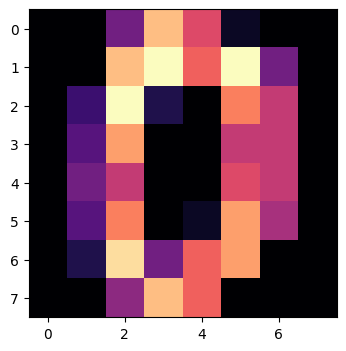

In [36]:
# On trace une image
plt.imshow(img[0], cmap='magma')

# On vérifie le label correspondant
print('Label de l image:\n', label[0], '\n')

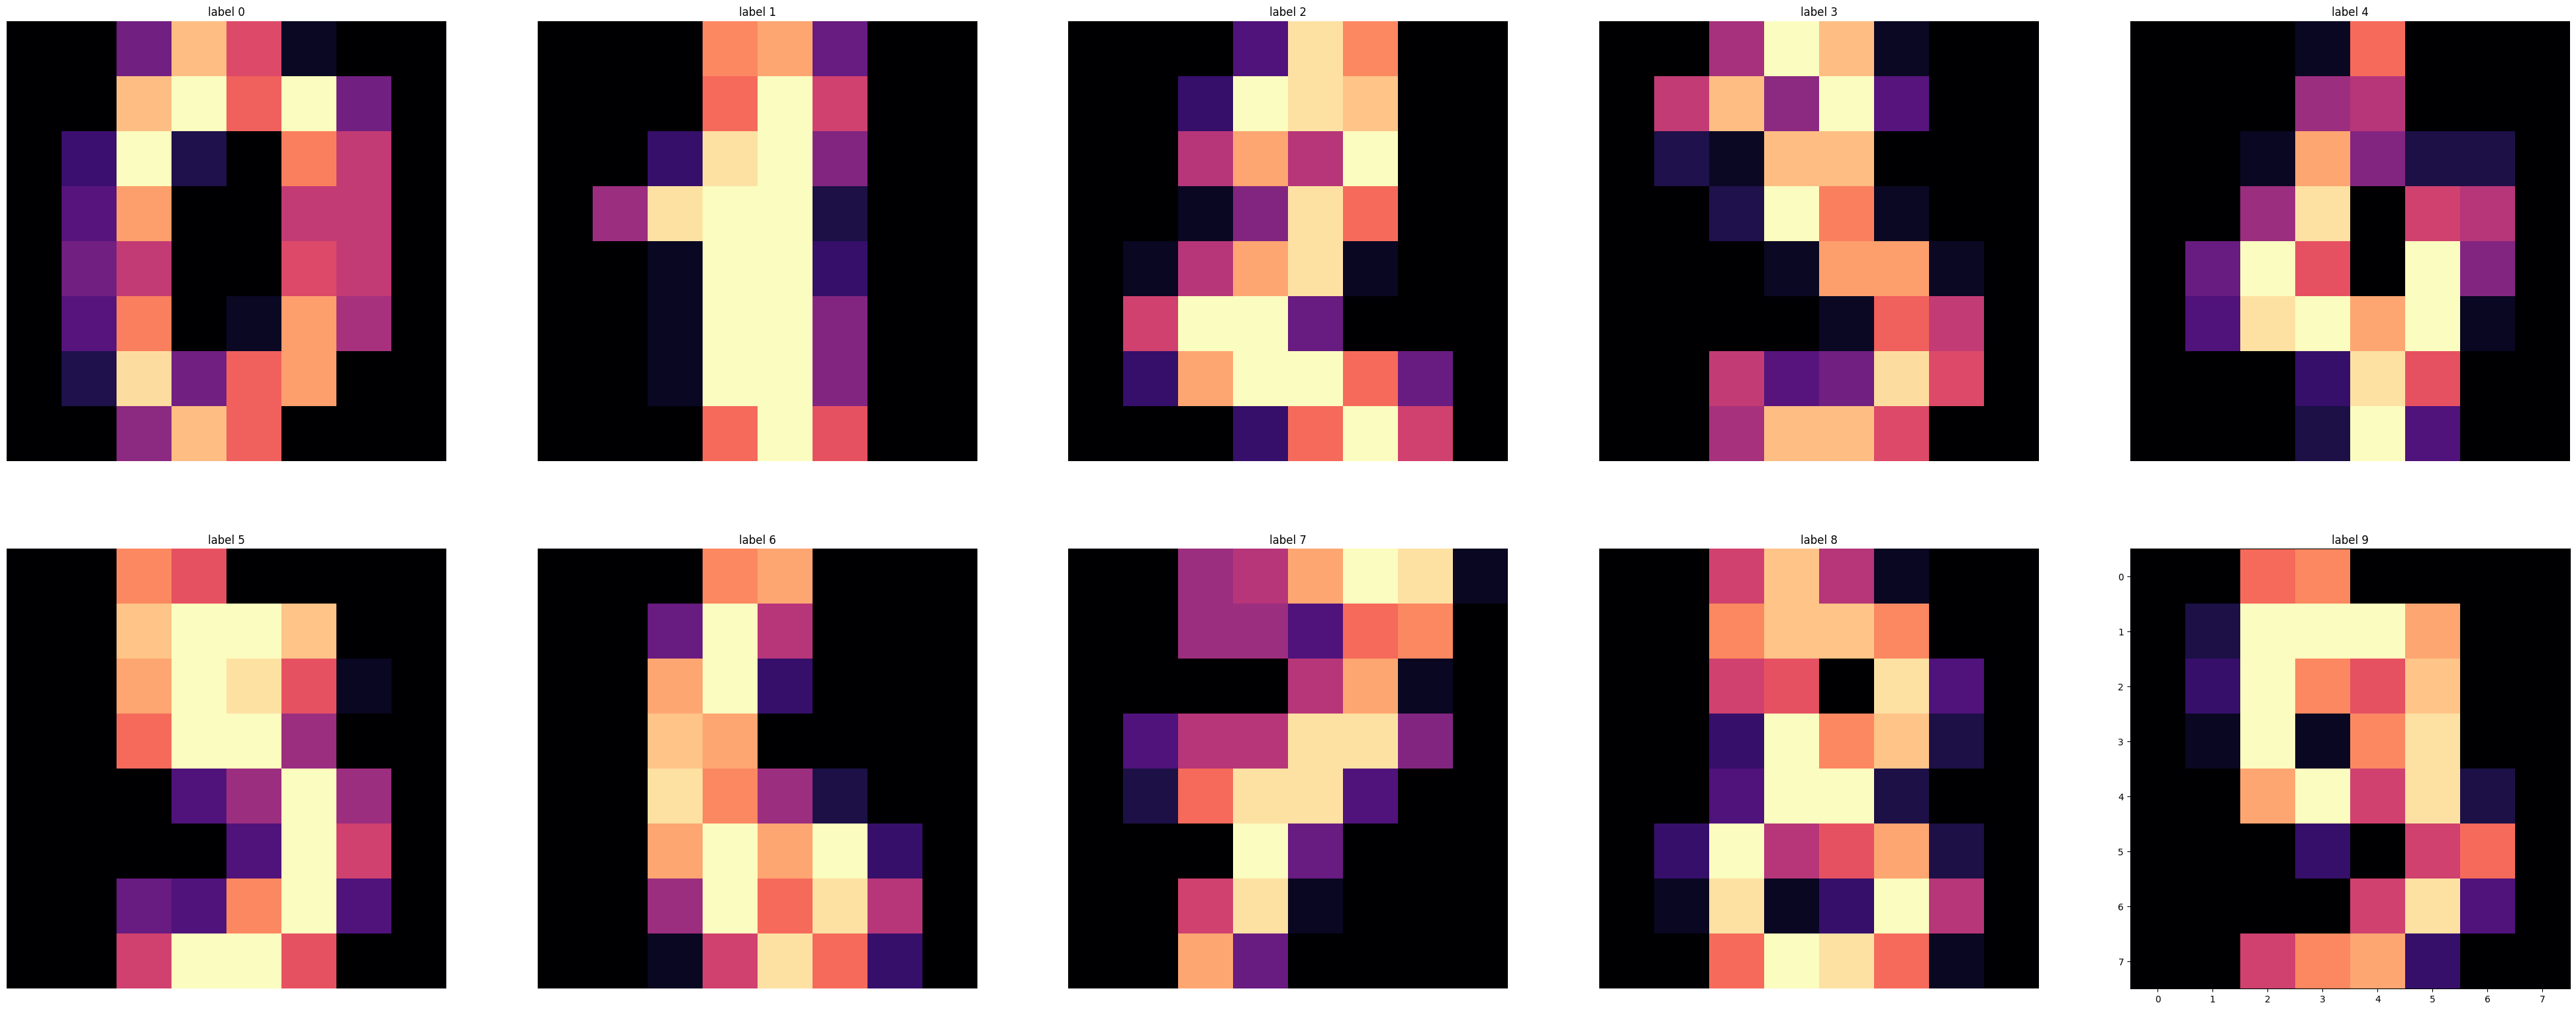

In [44]:
from cgitb import grey
# Display of our images 
plt.figure(figsize=(50, 50))
n = 10
for im, lab, i in zip(img[:n], label[:n], range(1, n+1)):
  plt.axis('off')
  plt.subplot(n//2, n//2, i)
  # Choisir des palettes de couleurs dans Matplotlib 
  # (https://matplotlib.org/stable/tutorials/colors/colormaps.html#choosing-colormaps-in-matplotlib)
  plt.imshow(im, cmap='magma')
  plt.title('label ' + str(lab))

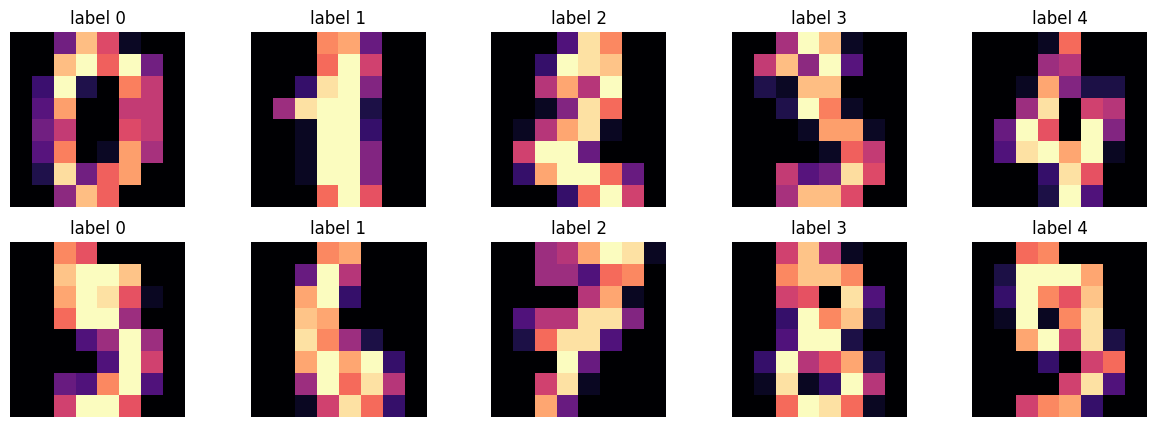

In [54]:
# Display of our images 
n =  10
cpt = 0
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
for ax_i in axes:
  for im, lab, ax_j in zip(img[:n], label[:n], ax_i):
    ax_j.set_axis_off()
    # ax.imshow(image[:,:,:,0], cmap=plt.cm.gray_r, interpolation="nearest")
    ax_j.imshow(img[cpt], cmap='magma')
    ax_j.set_title('label ' + str(lab))
    cpt += 1

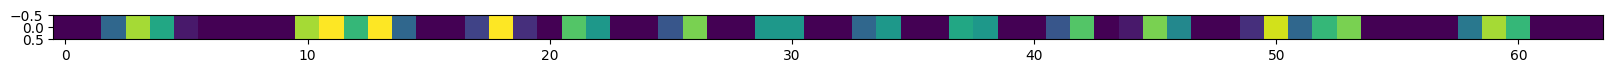

In [23]:
# On trace le vecteur de donnée correspondant

# On formate data data[0,] pour que la dimension 2 soit non-nulle (pour matplot)
X = np.reshape(data[0,], (1, len(data[0,])))

# On visualise (en changeant un peu l'échelle)
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(X)
plt.rcParams["figure.figsize"] =(6., 4.)

In [24]:
# On créé un jeu de données pour l'entrainement et un jeu de données pour le test
data_train = data[0:1000,]
lbl_train = label[0:1000,] 

data_test = data[1001:,]
lbl_test = label[1001:,] 

## 3. Création du classifier 

In [25]:
# On importe le module SVM (ou autre classifieur)
from sklearn import svm

# On instancie le classifieur
clf = svm.SVC()

## 4. Apprentissage du classifier

In [26]:
# On apprend le classifier sur les données
clf.fit(data_train, lbl_train)  

SVC()

## 5. Prédiction par le réseau

In [27]:
# On importe le module accuracy_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

# On prédit les labels à partir des donnnées
lbl_pred = clf.predict(data_train)

# On calcule la matrice de confusion
cm_train = confusion_matrix(lbl_train, lbl_pred)
print('La matrice de confusion sur le jeu d entrainement :\n', cm_train, '\n')

# On calcul le score d accuracy
acc_train=accuracy_score(lbl_train, lbl_pred)
print('L accuracy sur le jeu d entrainement est :\n', acc_train)


La matrice de confusion sur le jeu d entrainement :
 [[ 99   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0   0   0]
 [  0   0   0 104   0   0   0   0   0   0]
 [  0   0   0   0  98   0   0   0   0   0]
 [  0   0   0   0   0  99   0   0   0   1]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   0   0   0   0   0   0  99   0   0]
 [  0   0   0   0   0   0   0   0  98   0]
 [  0   0   0   0   0   0   0   0   0  99]] 

L accuracy sur le jeu d entrainement est :
 0.999


In [28]:
# Même chose mais sur le jeu de test

# On prédit les labels à partir des donnnées
lbl_pred = clf.predict(data_test)

# On calcule la matrice de confusion
cm_test = confusion_matrix(lbl_test, lbl_pred)
print('La matrice de confusion sur le jeu d entrainement :\n', cm_test, '\n')

# On calcul le score d accuracy
acc_test=accuracy_score(lbl_test, lbl_pred)
print('L accuracy sur le jeu d entrainement est :\n', acc_test, '\n')


La matrice de confusion sur le jeu d entrainement :
 [[78  0  0  0  1  0  0  0  0  0]
 [ 0 76  0  0  0  0  0  0  1  2]
 [ 1  0 75  1  0  0  0  0  0  0]
 [ 0  0  0 67  0  3  0  4  5  0]
 [ 0  0  0  0 79  0  0  0  0  4]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  1  0 79  0  0]
 [ 0  1  0  0  0  1  0  0 73  1]
 [ 0  0  0  1  0  2  0  1  0 77]] 

L accuracy sur le jeu d entrainement est :
 0.9597989949748744 



### Question

Q1 Quel phénomène observe-t-on? Pourquoi?  
Q2 Que faudrait-il faire pour éviter ce phénomène? 